### Linear Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

X = np.random.normal(0, 1, 100)

# Create y with a correlation ~0.6
true_slope = 0.8
noise = np.random.normal(0, 0.2, 100)  # Adding noise
y = true_slope * X + noise

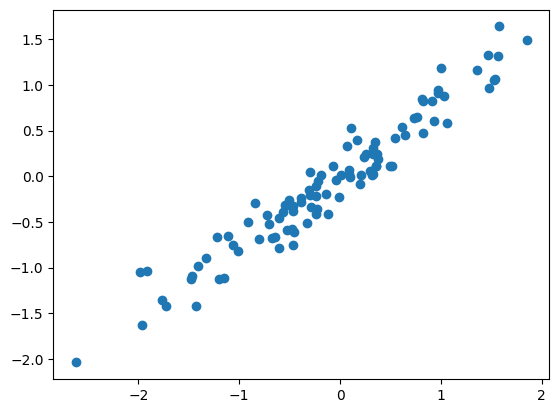

In [26]:
plt.scatter(X,y)

In [27]:
def loss_function(m,b,X,y):
  total_error = 0
  for i in range(len(X)):
    x1 = X[i]
    y1 = y[i]
    total_error += (y1 - (m*x1+b))**2
  total_error/float(len(X))
  return total_error

def gradient_descent(m_now, b_now, X,y, lr):
  m_gradient = 0
  b_gradient = 0

  n = len(X)

  for i in range(n):
    x1 = X[i]
    y1 = y[i]

    m_gradient -= (2/n) * x1 * (y1 - (m_now*x1+b_now))
    b_gradient -= (2/n) * (y1 - (m_now*x1+b_now))

  m = m_now - m_gradient * lr
  b = b_now - b_gradient * lr
  return m, b


Loss: 52.56876447751633
Loss: 3.534529929165156
Loss: 3.534529929165156
Loss: 3.534529929165156


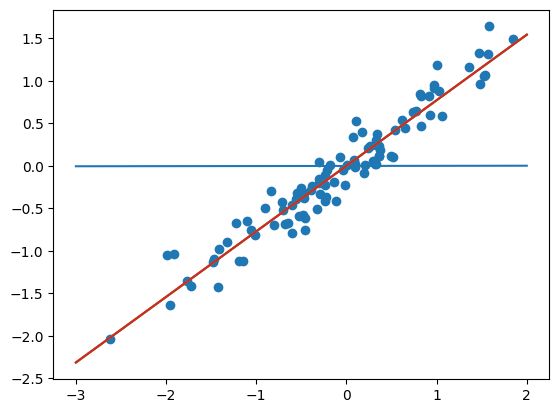

In [32]:
#Parameters
m = 0
b = 0
lr = 1e-3
epochs = 100000
x_vals = np.linspace(-3,2,100)

for i in range(epochs):
  m, b = gradient_descent(m,b,X,y,lr)
  if (i%(epochs/4)) == 0:
    plt.plot(x_vals, x_vals * m + b)
    print(f"Loss: {loss_function(m,b,X,y)}")

plt.scatter(X,y)

### Logistic Regression

In [19]:
import numpy as np
np.random.seed(42)

X = np.random.uniform(-10, 10, 100)
y = np.random.randint(0, 2, 100)


In [20]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

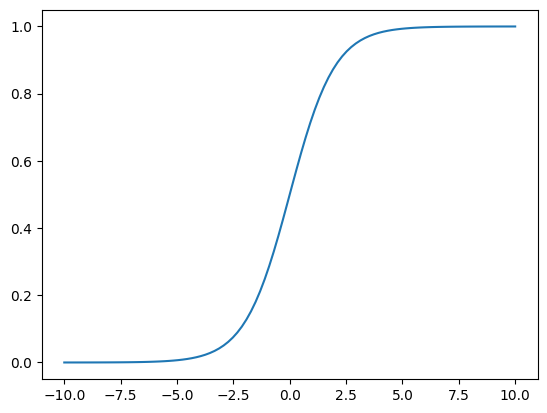

In [21]:
x_vals = np.linspace(-10,10,100)
plt.plot(x_vals,sigmoid(x_vals))

#### 🔹 Logistic Regression

##### **1. Loss Function (Log Loss / Binary Cross-Entropy)**

For a single training example $(x^{(i)}, y^{(i)})$:

$$
\mathcal{L}^{(i)} = - \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

Where:

$$
\hat{y}^{(i)} = \sigma(w^\top x^{(i)} + b)
$$

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

$$
y^{(i)} \in \{0, 1\}
$$

---

#### **2. Objective Function (Cost over dataset)**

The overall objective is to minimize the average loss over all $n$ samples:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} \mathcal{L}^{(i)} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$


### 🔹 Gradient of Logistic Regression Cost Function

The gradient of the cost function \( J(\theta) \) with respect to \( \theta \) is:

$$
\nabla_\theta J(\theta) = \frac{1}{m} X^\top \left( h_\theta(X) - y \right)
$$

Where:

- \( m \) is the number of training examples  
- \( X \in \mathbb{R}^{m \times n} \) is the input feature matrix  
- \( y \in \mathbb{R}^{m} \) is the vector of true labels  
- \( h_\theta(X) = \sigma(X \theta) \) is the vector of predicted probabilities  
- \( \sigma(z) = \frac{1}{1 + e^{-z}} \) is the sigmoid function


In [22]:
def calculate_gradient(theta, X, y):
  m = y.size
  return (1/m) * (X.T @ (sigmoid(X @ theta) - y))

def gradient_descent(X,y, lr=1e-3,num_iter=1000, tol=1e-7):
  #Add Bias Term, prepending it
  X_b = np.c_[np.ones((X.shape[0],1)), X]

  theta = np.zeros(X_b.shape[1])

  for i in range(num_iter):
    grad = calculate_gradient(theta,X_b,y)
    theta -= lr * grad

    if np.linalg.norm(grad) < tol:
      break
  return theta

def predict_proba(X, theta):
  X_b = np.c_[np.ones((X.shape[0],1)), X]
  return sigmoid(X_b @ theta)

def predict(X, theta, threshold=0.5):
  return (predict_proba(X,theta) >= threshold).astype(int)

In [23]:
#Checking this Model against Sklearn Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

theta_hat = gradient_descent(X_train_scaled,y_train,1e-3,100000)

y_pred_train = predict(X_train_scaled, theta_hat)
y_pred_test = predict(X_test_scaled, theta_hat)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(train_acc, test_acc)

0.9846153846153847 0.9912280701754386


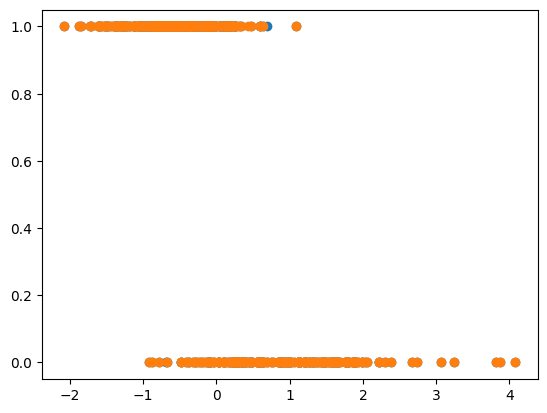

In [24]:
plt.scatter(X_train_scaled[:,0],y_train)
plt.scatter(X_train_scaled[:,0],y_pred_train)